In [2]:
import random
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## i.Data Generation Based on given Code 

In [3]:
id_1 = 7721 #change to first student id
id_2 = 7818 #change to second student id
id_3 = 0000 #change to third student id "leave 0000 if team of 2"
random_seed = id_1+id_2+id_3
random.seed(random_seed)
data_path="Data.csv"#replace with data path
output_path="MyData.csv"#replace with output data path

all_data=pd.read_csv(data_path) 
all_columns = all_data.columns.tolist()

target_column = 'smoking'  

all_columns.remove(target_column)

selected_columns = random.sample(all_columns, 10)

print(selected_columns) #MUST BE PRINTED
selected_columns = np.append(selected_columns, target_column)
sample_df = all_data[selected_columns].copy()
sample_df.to_csv(output_path)   #From HERE YOU CAN SPLIT FOR TRAIN ,VALID AND TEST


['hearing(left)', 'Cholesterol', 'ALT', 'eyesight(left)', 'waist(cm)', 'hearing(right)', 'dental caries', 'hemoglobin', 'weight(kg)', 'serum creatinine']


## ii.Data Check and normalization

In [4]:
# Load the dataset
data = pd.read_csv("MyData.csv") 

# Drop the first column by index
data = data.drop(data.columns[0], axis=1)

# save the updated dataset back to a CSV file
data.to_csv("MyData_updated.csv", index=False)

# Display the first few rows
print("First few rows of the dataset:")
display(data.head())

# Overview of the dataset
print("\nDataset Information:")
data.info()

print("\nStatistical Summary:")
display(data.describe())



First few rows of the dataset:


,hearing(left),Cholesterol,ALT,eyesight(left),waist(cm),hearing(right),dental caries,hemoglobin,weight(kg),serum creatinine,smoking
0,1,172,25,0.5,81.0,1,0,16.5,60,1.0,1
1,2,194,23,0.6,89.0,2,1,16.2,65,1.1,0
2,1,178,31,0.4,81.0,1,0,17.4,75,0.8,1
3,1,180,27,1.5,105.0,1,1,15.9,95,1.0,0
4,1,155,13,1.5,80.5,1,0,15.4,60,0.8,1



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hearing(left)     159256 non-null  int64  
 1   Cholesterol       159256 non-null  int64  
 2   ALT               159256 non-null  int64  
 3   eyesight(left)    159256 non-null  float64
 4   waist(cm)         159256 non-null  float64
 5   hearing(right)    159256 non-null  int64  
 6   dental caries     159256 non-null  int64  
 7   hemoglobin        159256 non-null  float64
 8   weight(kg)        159256 non-null  int64  
 9   serum creatinine  159256 non-null  float64
 10  smoking           159256 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 13.4 MB

Statistical Summary:


,hearing(left),Cholesterol,ALT,eyesight(left),waist(cm),hearing(right),dental caries,hemoglobin,weight(kg),serum creatinine,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,1.023974,195.796165,26.550296,1.005798,83.001990,1.023421,0.197996,14.796965,67.143662,0.892764,0.437365
std,0.152969,28.396959,17.753070,0.402113,8.957937,0.151238,0.398490,1.431213,12.586198,0.179346,0.496063
min,1.000000,77.000000,1.000000,0.100000,51.000000,1.000000,0.000000,4.900000,30.000000,0.100000,0.000000
25%,1.000000,175.000000,16.000000,0.800000,77.000000,1.000000,0.000000,13.800000,60.000000,0.800000,0.000000
50%,1.000000,196.000000,22.000000,1.000000,83.000000,1.000000,0.000000,15.000000,65.000000,0.900000,0.000000
75%,1.000000,217.000000,32.000000,1.200000,89.000000,1.000000,0.000000,15.800000,75.000000,1.000000,1.000000
max,2.000000,393.000000,2914.000000,9.900000,127.000000,2.000000,1.000000,21.000000,130.000000,9.900000,1.000000


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])

#Handle missing values:
data.fillna(data.median(), inplace=True)

#remove outliers using IQR!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
df = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)] ## remvoe outliers

#scaling (Normalization)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)




Missing Values in Each Column:
Series([], dtype: int64)


## 1.Data Analysis : Univariate

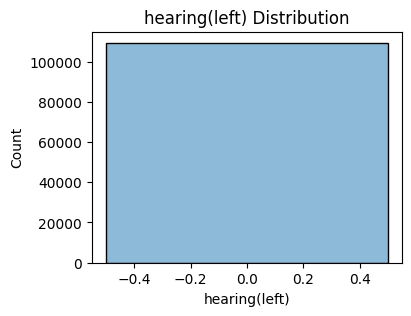

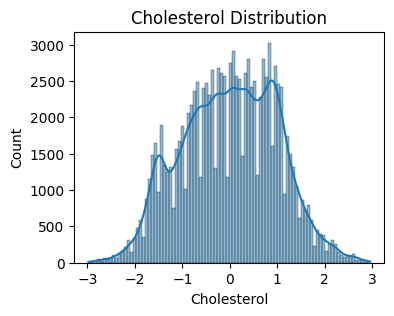

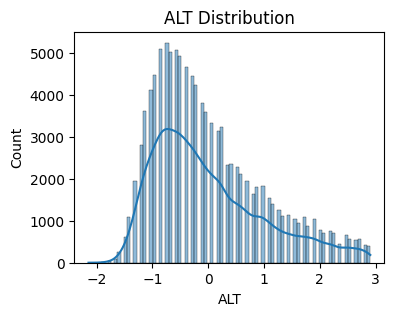

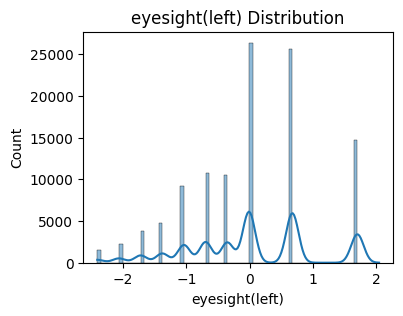

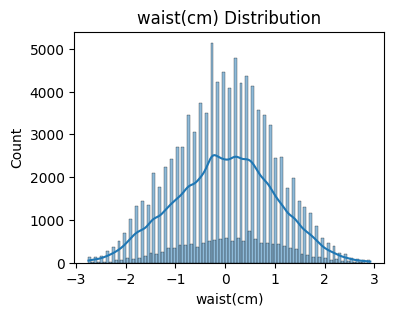

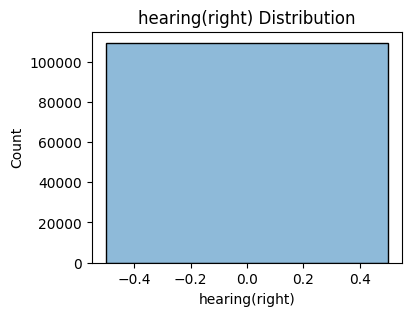

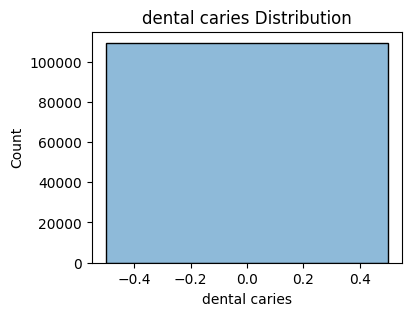

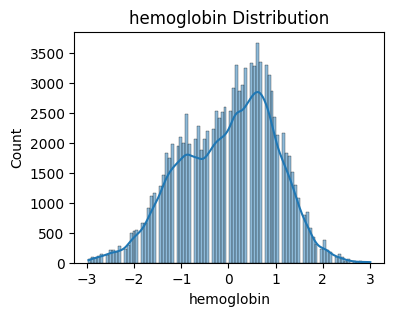

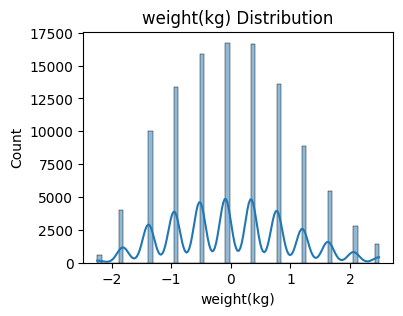

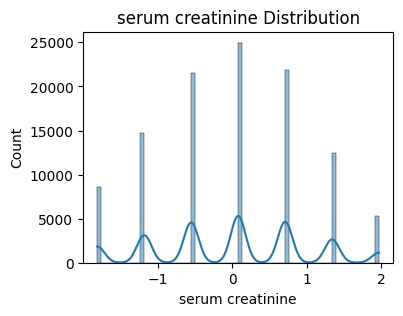

In [81]:
for column in df_scaled.columns:
    if column != 'smoking':  
        plt.figure(figsize=(4,3))
        sns.histplot(df_scaled[column], kde=True)
        plt.title(f'{column} Distribution')
        plt.show()

studying the data only without paying attention to the label is not very insightful. it only helps see if some feature is skewed.

next we study each feature with respect to the label.

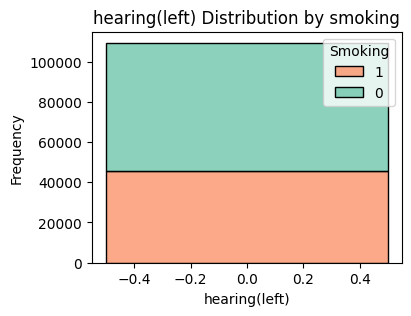

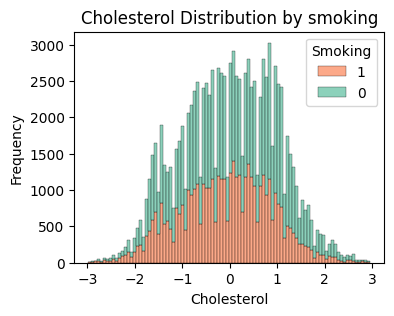

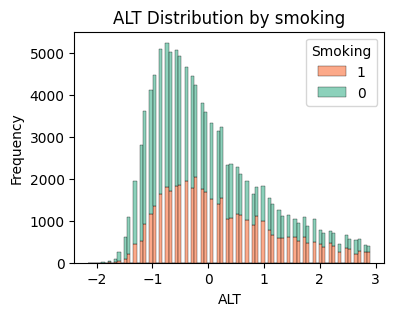

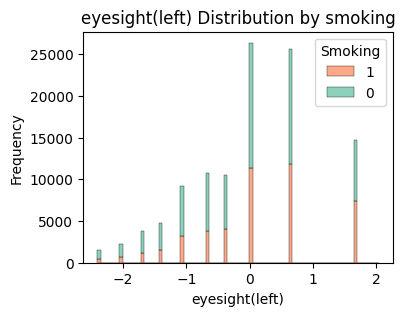

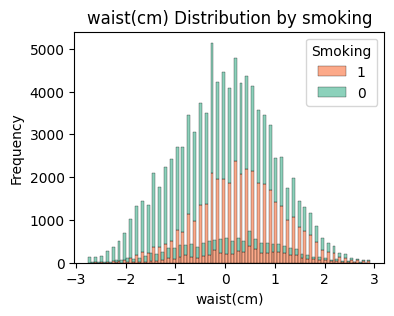

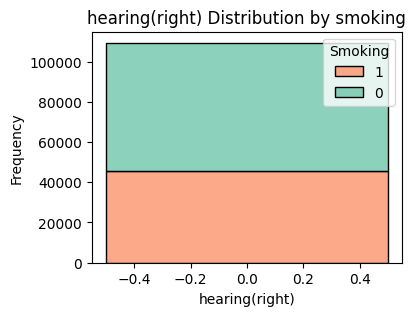

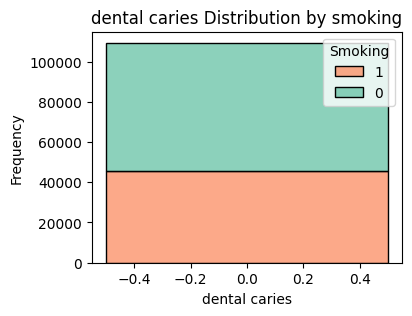

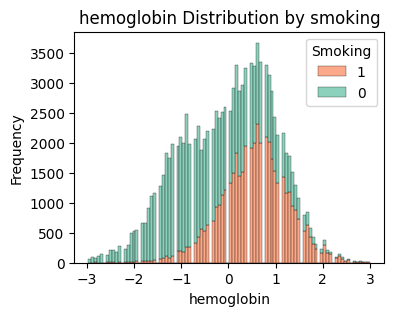

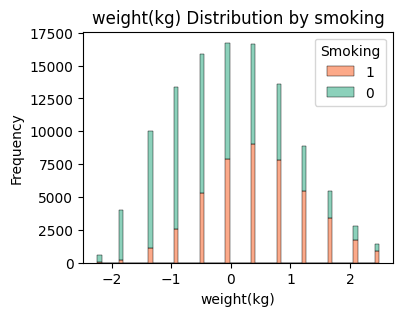

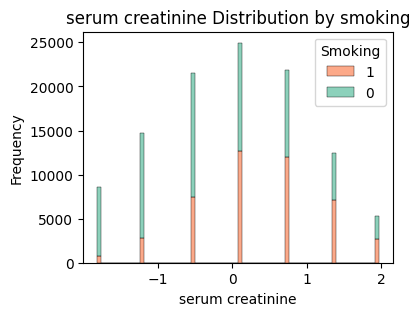

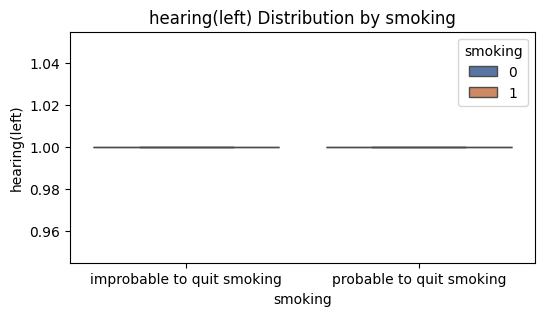

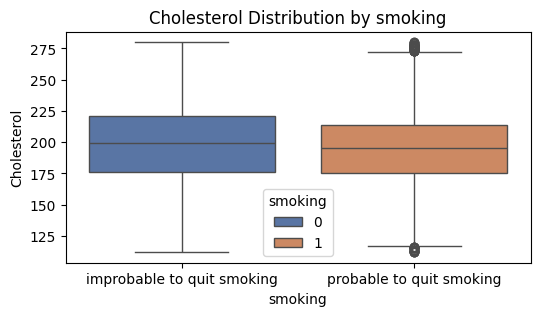

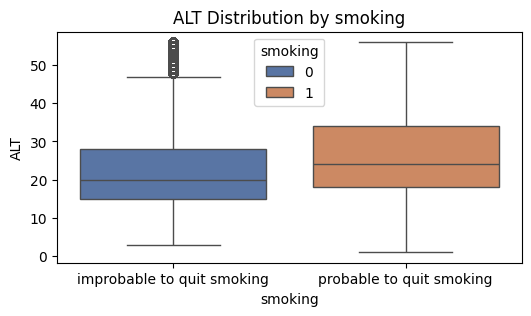

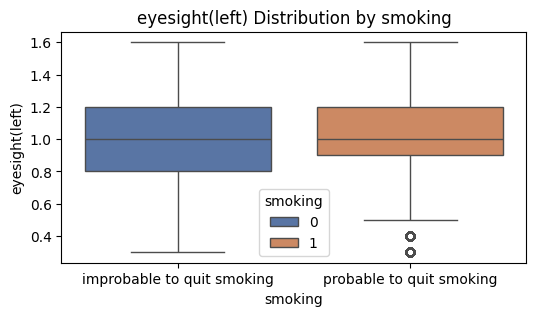

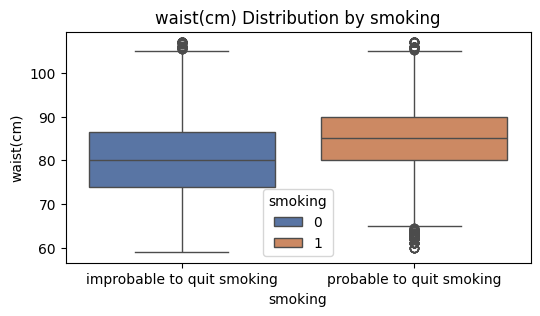

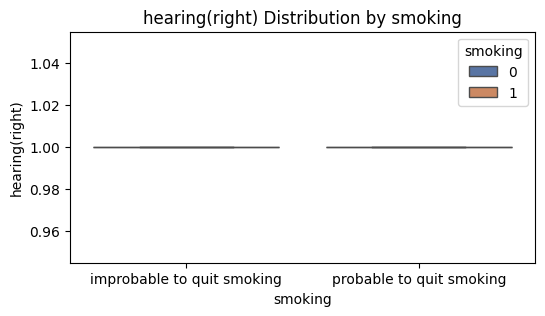

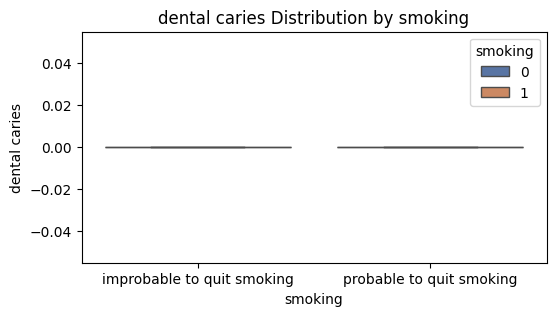

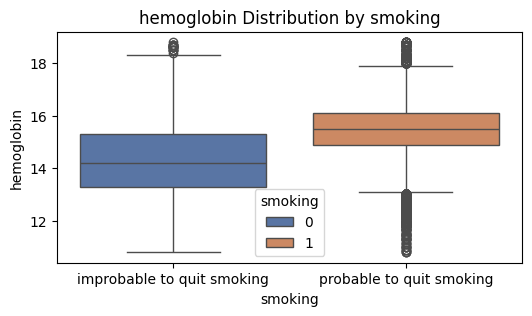

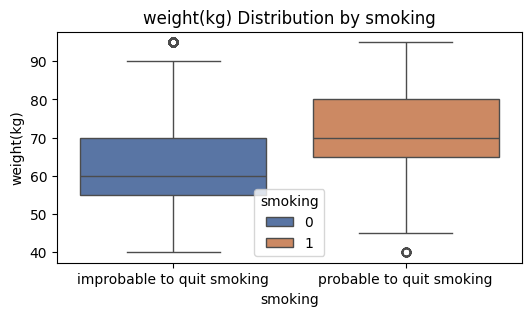

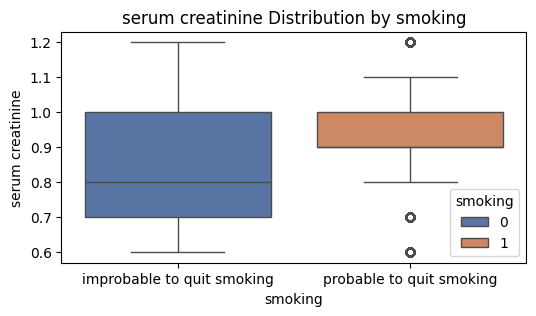

In [83]:
# Features and label
features = ['hearing(left)', 'Cholesterol', 'ALT', 'eyesight(left)', 'waist(cm)', 
            'hearing(right)', 'dental caries', 'hemoglobin', 'weight(kg)', 'serum creatinine']
label = 'smoking'

# Iterate through each feature and plot histogram
for feature in features:
    plt.figure(figsize=(4, 3))
    sns.histplot(data=df_scaled, x=feature, hue=label, multiple='stack', palette='Set2')
    plt.title(f'{feature} Distribution by {label}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Smoking', labels=df[label].unique())
    plt.show()
    
for feature in features:
    plt.figure(figsize=(6, 3))
    sns.boxplot( x= label, y= feature, data= df, palette="deep", hue=label)
    plt.title(f'{feature} Distribution by {label}')
    plt.xlabel(label)
    plt.ylabel(feature)
    plt.xticks([0,1],['improbable to quit smoking', 'probable to quit smoking'])
    plt.show()

it becomes clear certain faetures are more indicative of a class label while others are not helpful.

helpful features:
weight, serum creatinine, hemoglobin, waist, alt.

## Data Analysis : Bivariate

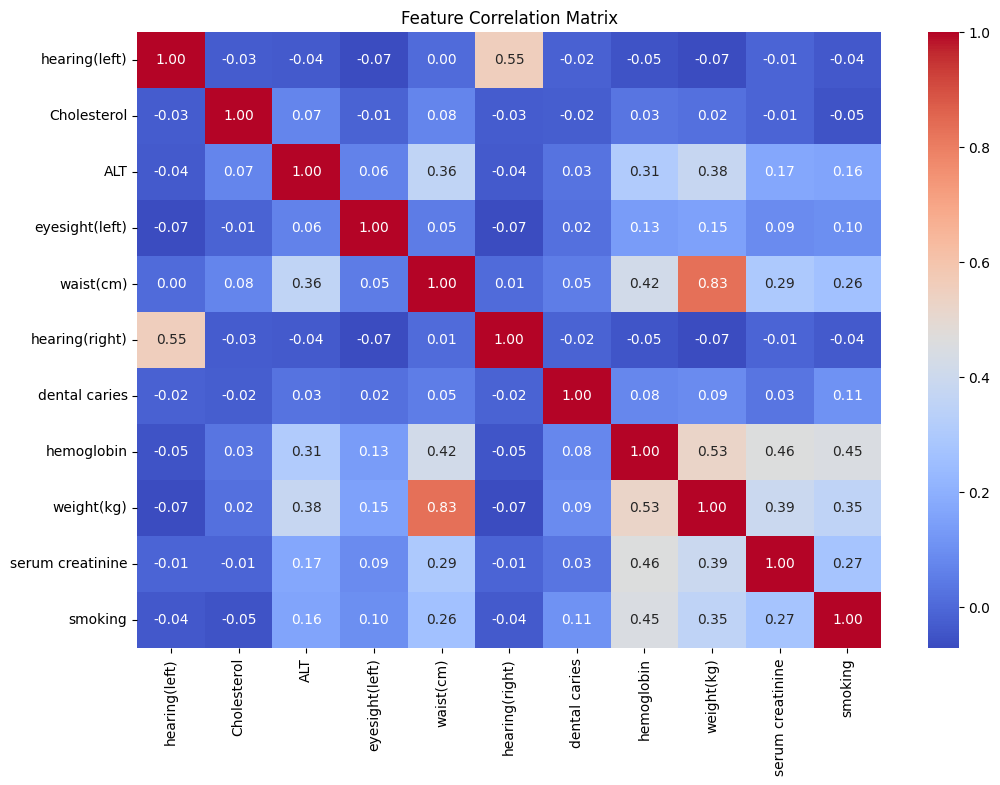

'\n[ \'ALT\', \'waist(cm)\',  \'hemoglobin\', \'weight(kg)\', \'serum creatinine\']\n\n# Scatter plots for selected pairs\nselected_pairs = [("nicotine_dependency", "daily_cigarettes"),\n                 ("carbon_monoxide_levels", "age_of_initiation")]\n\nfor x, y in selected_pairs:\n    plt.figure(figsize=(8, 6))\n    sns.scatterplot(data=data, x=x, y=y, hue="smoking_status", alpha=0.7)\n    plt.title(f"{x} vs {y}")\n    plt.xlabel(x)\n    plt.ylabel(y)\n    plt.show()\n    '

In [8]:
# Heatmap for correlations
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


'''
[ 'ALT', 'waist(cm)',  'hemoglobin', 'weight(kg)', 'serum creatinine']

# Scatter plots for selected pairs
selected_pairs = [("nicotine_dependency", "daily_cigarettes"),
                 ("carbon_monoxide_levels", "age_of_initiation")]

for x, y in selected_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x, y=y, hue="smoking_status", alpha=0.7)
    plt.title(f"{x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    '''


we note that some features have somewhat postive correlations with one another.
 - positive correlations with smoking:
   [waist, hemoglobin, weight, serum creatinine]

 - paris with postive correlations:
   (ALT,weight)
   (ALT,hemoglobin)
 ( ALT,waist)

 - (waist,serum creatinine)
   (waist,wieght)
   (waist,hemoglobin)

 - (weight,serum creatinine)
   (weight,hemoglobin)


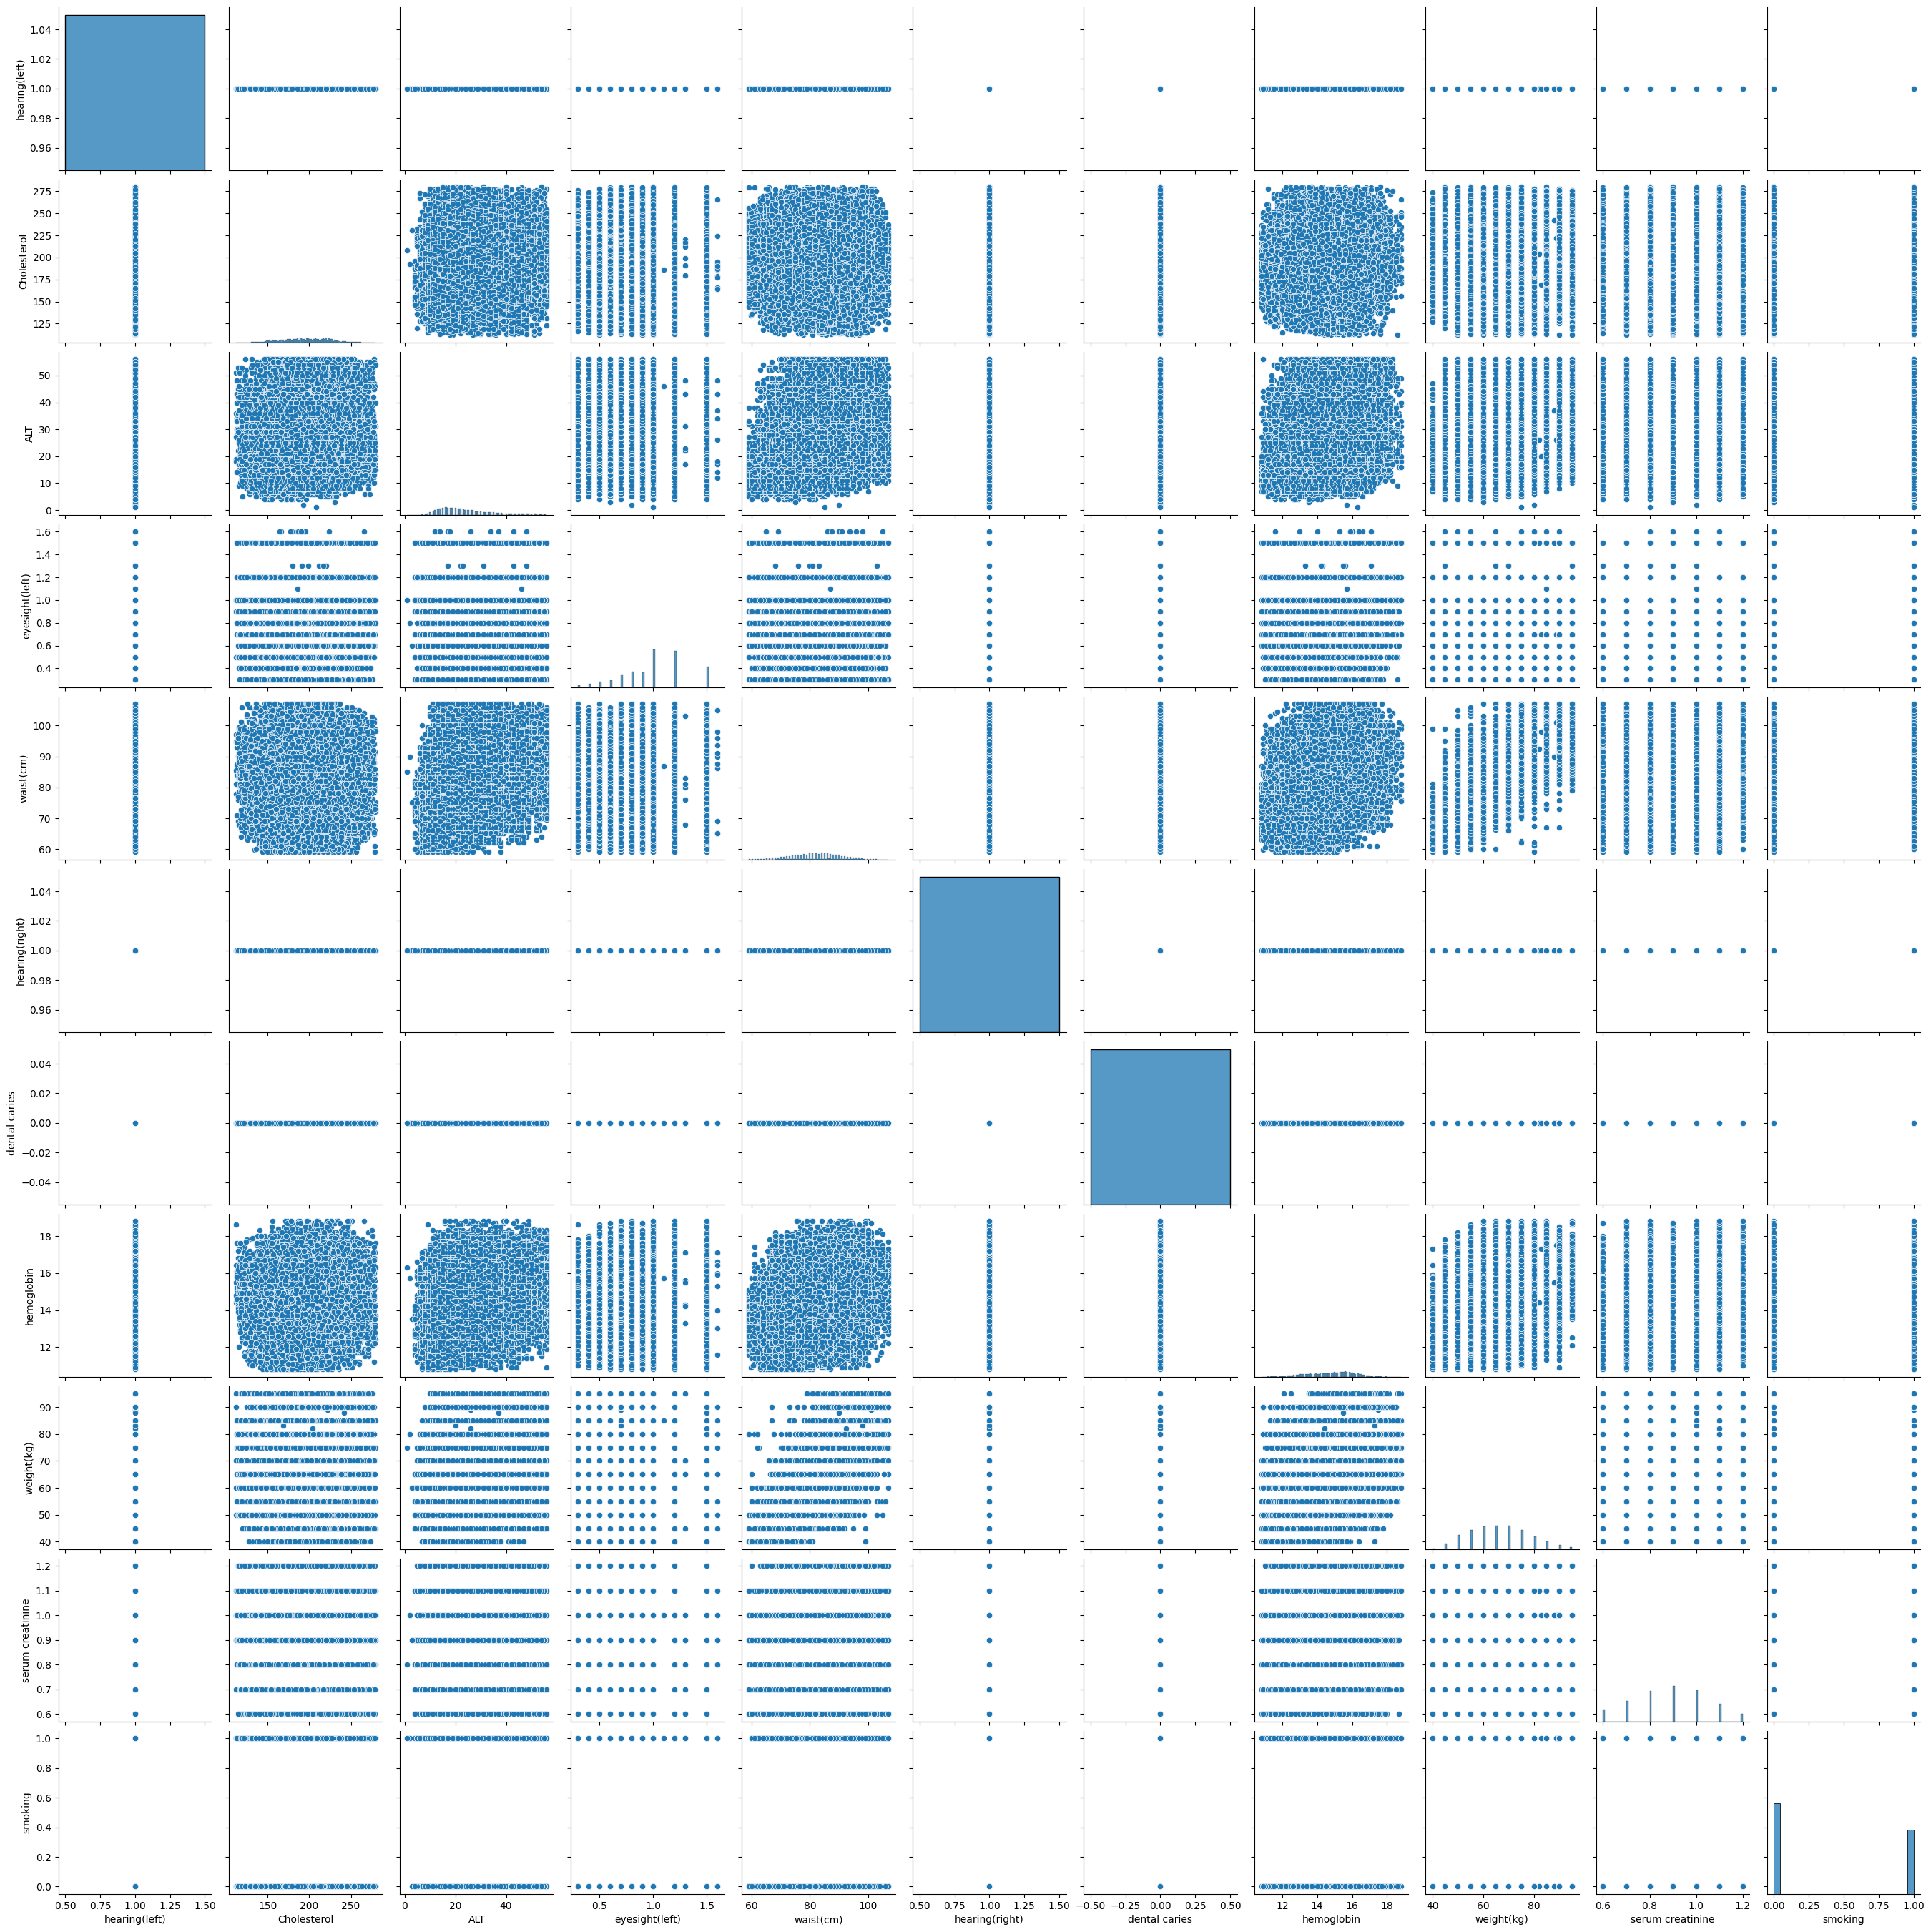

In [9]:
# Select numeric columns (or specific columns) from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Use the selected columns to create a pairplot
sns.pairplot(df[numeric_columns])  # Pass the DataFrame with numeric columns
plt.show()

## Data Analysis: multivariate

using linear regression since the label is binary

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73     19189
           1       0.63      0.64      0.63     13627

    accuracy                           0.69     32816
   macro avg       0.68      0.68      0.68     32816
weighted avg       0.69      0.69      0.69     32816



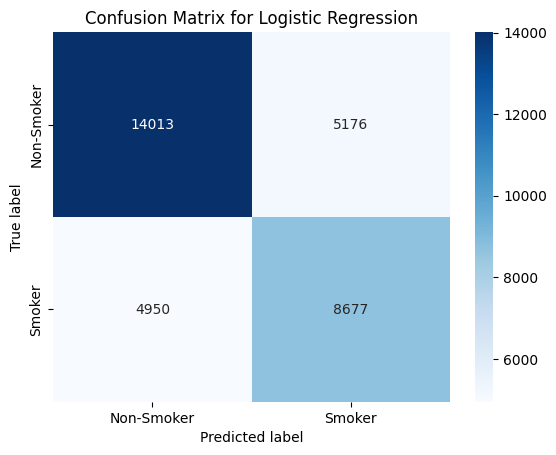

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


features = ['hearing(left)', 'Cholesterol', 'ALT', 'eyesight(left)', 'waist(cm)', 
            'hearing(right)', 'dental caries', 'hemoglobin', 'weight(kg)', 'serum creatinine']

# Split the data into training and testing sets
X = df_scaled[features]
y = df['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## PCA

In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Fit PCA (assuming PCA is already fitted with n_components=2 or n_components=3)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled[features])

# Display the components and their loadings
component_df = pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print("PCA Components (Loadings):")
print(component_df)

# To show the absolute contributions of features for each component
feature_contributions = component_df.abs()

# Show the features that contribute most to each principal component
for i in range(pca.n_components_):
    print(f"Top contributing features for PC{i+1}:")
    top_contributors = feature_contributions.iloc[i].sort_values(ascending=False).head(3)  # top 3 features
    print(top_contributors)
    print()


PCA Components (Loadings):
     hearing(left)  Cholesterol       ALT  eyesight(left)  waist(cm)  \
PC1            0.0     0.029048  0.365620        0.149751   0.480476   
PC2            0.0     0.729967  0.230359       -0.530680   0.227157   

     hearing(right)  dental caries  hemoglobin  weight(kg)  serum creatinine  
PC1   -0.000000e+00  -0.000000e+00    0.447076    0.525516          0.368987  
PC2    5.551115e-17  -1.387779e-17   -0.146257    0.036629         -0.241099  
Top contributing features for PC1:
weight(kg)    0.525516
waist(cm)     0.480476
hemoglobin    0.447076
Name: PC1, dtype: float64

Top contributing features for PC2:
Cholesterol         0.729967
eyesight(left)      0.530680
serum creatinine    0.241099
Name: PC2, dtype: float64



note that hearing left, hearing right , and dental carries contribute very little. we might drop them for dimensionality reduction.

now, we attempt to retrain the model using only seven features(excluding hearing left, hearing right , and dental carries )

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73     19189
           1       0.63      0.64      0.63     13627

    accuracy                           0.69     32816
   macro avg       0.68      0.68      0.68     32816
weighted avg       0.69      0.69      0.69     32816



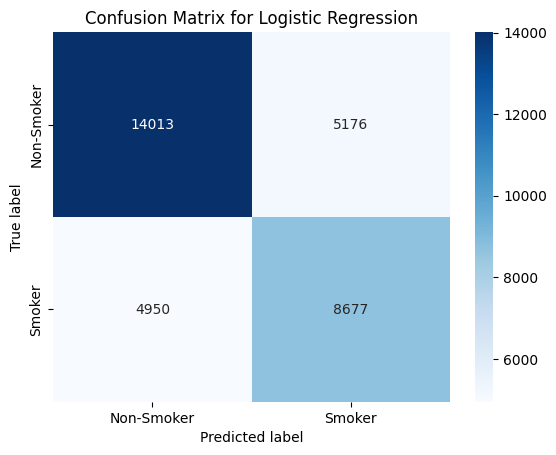

In [84]:
features = ['Cholesterol', 'ALT', 'eyesight(left)', 'waist(cm)', 
              'hemoglobin', 'weight(kg)', 'serum creatinine']

# Split the data into training and testing sets
X = df_scaled[features]
y = df['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

now, we attempt to retrain the model using only the fearures with high correlation to smoking.

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74     19189
           1       0.63      0.63      0.63     13627

    accuracy                           0.69     32816
   macro avg       0.68      0.68      0.68     32816
weighted avg       0.69      0.69      0.69     32816



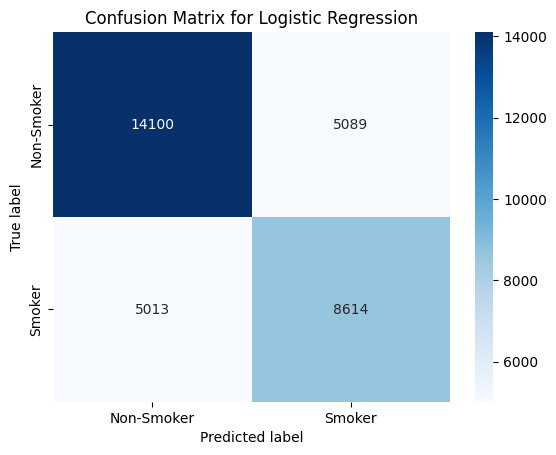

In [13]:
features = [ 'waist(cm)', 
              'hemoglobin', 'weight(kg)', 'serum creatinine']

# Split the data into training and testing sets
X = df_scaled[features]
y = df['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

note that we have managed to refuce the dimensionality drastically while getting the consistent accuracy.

## Bonus Experimental Feature Engineering
 for the sake of experiment, we will engineer a feature which is the product of the four most correlated features with 'smoking'. we will call this feature E_feature.
 - E_feautre=  'hemoglobin' * 'weight(kg)'

In [72]:
features = [ 'waist(cm)', 'hemoglobin', 'weight(kg)', 'serum creatinine']

# Split the data into training and testing sets
X = df_scaled[features] 
y = df['smoking']

# Convert X and y to numpy arrays for clarity
X_scaled = np.array(X)
y = np.array(y)

# Engineered feature: Multiply features across columns for each sample
E_feature = X_scaled[:, 1] * X_scaled[:, 2] 

# Concatenate the engineered feature to the original features
E_X = np.column_stack((X_scaled, E_feature))  # Shape will now be (109386, 5)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(E_X, y, test_size=0.3, random_state=42, stratify=y)


In [73]:
# Display the first few rows of the processed datasets
print("First few rows of the training set:")
print(X_train[:3])

print("\nFirst few rows of the test set:")
print(X_test[:3])

First few rows of the training set:
[[-0.03191435  1.21478193  0.33825249  0.71056785  0.41090301]
 [ 1.73705132  0.46776826  1.62816423  0.0807063   0.76160355]
 [ 0.79360296  0.16896279  1.19819365  1.3404294   0.20245014]]

First few rows of the test set:
[[ 0.79360296 -0.50334951  1.19819365  0.71056785 -0.60311019]
 [ 2.09084445  0.99067783  1.62816423  1.3404294   1.6129862 ]
 [ 1.26532714  1.36418466  0.76822307 -0.54915525  1.04799812]]


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73     19189
           1       0.62      0.72      0.67     13627

    accuracy                           0.70     32816
   macro avg       0.70      0.70      0.70     32816
weighted avg       0.71      0.70      0.70     32816



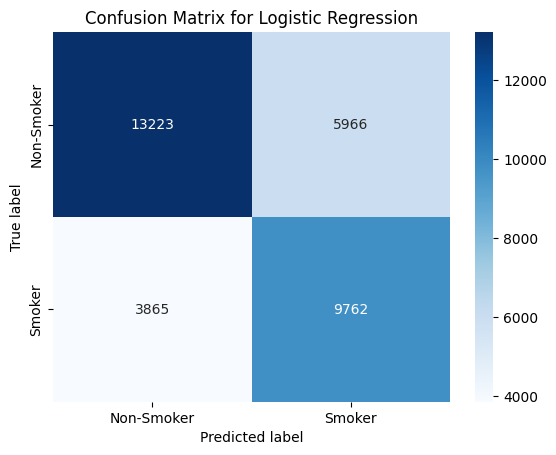

In [74]:
#Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

our new feautre resulted in a slightly increased accuracy

## 3.Ensembles
 firstly we will use sickit learn premade ensembles for refrence and we will train using all 10 features.


In [86]:
all_feautres=['hearing(left)', 'Cholesterol', 'ALT', 'eyesight(left)', 'waist(cm)', 'hearing(right)', 'dental caries', 'hemoglobin', 'weight(kg)', 'serum creatinine']

# Split the data into training and testing sets
X = df_scaled[all_feautres] 
y = df['smoking']

# Convert X and y to numpy arrays for clarity
X_scaled = np.array(X)
y = np.array(y)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Verify shapes
print("Training set size:", X_train.shape)
print("Validation set size:", X_valid.shape)
print("Test set size:", X_test.shape)



Training set size: (65631, 10)
Validation set size: (21877, 10)
Test set size: (21878, 10)


#### using sickintlearn

In [87]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a BaggingClassifier with a DecisionTreeClassifier as the base estimator
bagging = BaggingClassifier(
    DecisionTreeClassifier(),  # Base model
    n_estimators=300,                         # Number of estimators
    random_state=42                          # Reproducibility
)

# Fit the model to the training data
bagging.fit(X_train, y_train)

# Evaluate the model on the validation data
y_pred = bagging.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print("Bagging Accuracy:", accuracy)

Bagging Accuracy: 0.696713443342323


In [89]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create an AdaBoostClassifier with a DecisionTreeClassifier as the base estimator
boosting = AdaBoostClassifier(
   DecisionTreeClassifier(max_depth=1),  # Shallow decision tree as base model
    n_estimators=300,                                  # Number of estimators
    random_state=42                                    # Reproducibility
)

# Fit the model to the training data
boosting.fit(X_train, y_train)

# Evaluate the model on the validation data
y_pred = boosting.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print("Boosting Accuracy:", accuracy)


a:\pycharm\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting Accuracy: 0.7051241029391598


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a RandomForestClassifier
random_forest = RandomForestClassifier(
    n_estimators=300,        # Number of estimators
    random_state=42,          # Reproducibility
    n_jobs=-1                 # Use all cores for faster training
)

# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Evaluate the model on the validation data
y_pred = random_forest.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.705215523152169


#### using custom ensembles
 we are going to use selected faetures .

In [128]:


features = [ 'waist(cm)', 'hemoglobin', 'weight(kg)', 'serum creatinine','eyesight(left)','Cholesterol']

# Split the data into training and testing sets
X = df_scaled[features] 
y = df['smoking']

# Convert X and y to numpy arrays for clarity
X_scaled = np.array(X)
y = np.array(y)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Verify shapes
print("Training set size:", X_train.shape)
print("Validation set size:", X_valid.shape)
print("Test set size:", X_test.shape)



Training set size: (65631, 6)
Validation set size: (21877, 6)
Test set size: (21878, 6)


#### Bagging

In [126]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

class BaggingClassifier:
    def __init__(self, base_estimators=None, n_estimators=300, random_state=None):
        """
        Bagging ensemble classifier.

        Parameters:
        - base_estimators: List of base models to use for bagging (default: [DecisionTreeClassifier()]).
        - n_estimators: Number of estimators/models in the ensemble.
        - random_state: Random seed for reproducibility.
        """
        self.base_estimators = base_estimators or [DecisionTreeClassifier()]
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.models = []

    def fit(self, X, y):
        """
        Train the bagging classifier by fitting multiple base estimators on bootstrapped samples.
        """
        np.random.seed(self.random_state)
        self.models = []
        n_estimators_per_model = self.n_estimators // len(self.base_estimators)
        
        for base_estimator in self.base_estimators:
            for _ in range(n_estimators_per_model):
                # Create a bootstrap sample
                indices = np.random.choice(len(X), size=len(X), replace=True)
                X_bootstrap = X[indices]
                y_bootstrap = y[indices]
                
                # Train a new base model on the bootstrap sample
                model = clone(base_estimator)
                model.fit(X_bootstrap, y_bootstrap)
                self.models.append(model)

    def predict(self, X):
        """
        Predict class labels for the input data by majority voting.
        """
        # Collect predictions from each model
        predictions = np.array([model.predict(X) for model in self.models])
        
        # Perform majority voting
        majority_vote = mode(predictions, axis=0).mode.flatten()
        return majority_vote


# Define a list of diverse base classifiers
base_estimators = [
    DecisionTreeClassifier(),
    #LogisticRegression(),
    #KNeighborsClassifier(),
]

# Initialize and train the Bagging ensemble
bagging_model = BaggingClassifier(base_estimators=base_estimators, n_estimators=300, random_state=42)
bagging_model.fit(X_train, y_train)

# Make predictions
majority_vote = bagging_model.predict(X_valid)
# Evaluate the model
accuracy = accuracy_score(y_valid, majority_vote)
print("Bagging Accuracy:", accuracy)


Bagging Accuracy: 0.6811262970242721


#### Boosting

In [110]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

class BoostClassifier:
    def __init__(self, base_estimators=None, n_estimators=100, random_state=None):
        """
        AdaBoost ensemble classifier.

        Parameters:
        - base_estimators: List of base models to use for boosting.
        - n_estimators: Total number of models in the ensemble.
        - random_state: Random seed for reproducibility.
        """
        self.base_estimators = base_estimators or [DecisionTreeClassifier(max_depth=1, random_state=random_state)]
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        """
        Train the AdaBoost classifier using weighted training samples.
        """
        np.random.seed(self.random_state)
        n_samples = len(X)
        weights = np.ones(n_samples) / n_samples
        self.models = []
        self.alphas = []

        n_estimators_per_model = self.n_estimators // len(self.base_estimators)

        for base_estimator in self.base_estimators:
            for _ in range(n_estimators_per_model):
                # Clone the base estimator
                model = clone(base_estimator)
                
                # Resample the dataset based on the weights manually
                indices = np.random.choice(n_samples, size=n_samples, replace=True, p=weights)
                X_resampled, y_resampled = X[indices], y[indices]
                model.fit(X_resampled, y_resampled)
                
                # Predict on the full dataset
                y_pred = model.predict(X)

                # Calculate error and alpha
                incorrect = (y_pred != y)
                error = np.dot(weights, incorrect) / np.sum(weights)

                # Avoid division by zero or invalid alpha calculation
                if error >= 1.0:
                    continue
                alpha = 0.5 * np.log((1 - error) / error) if error > 0 else 1.0
                self.alphas.append(alpha)

                # Update weights
                weights *= np.exp(-alpha * y * y_pred)
                weights /= np.sum(weights)

                # Store the model
                self.models.append(model)

    def predict(self, X):
        """
        Predict class labels using weighted voting.
        """
        model_preds = np.array([model.predict(X) for model in self.models])
        weighted_preds = np.zeros(model_preds.shape[1])

        for i in range(len(self.models)):
            weighted_preds += self.alphas[i] * model_preds[i]

        return np.sign(weighted_preds)



# Define diverse base classifiers
base_estimators = [
    DecisionTreeClassifier(max_depth=1, random_state=42),
    
]

# Train the AdaBoost ensemble
adaboost_model = BoostClassifier(base_estimators=base_estimators, n_estimators=300, random_state=42)
adaboost_model.fit(X_train, y_train)

# Make predictions
y_pred_adaboost = adaboost_model.predict(X_valid)
print("AdaBoost Accuracy:", accuracy_score(y_valid, y_pred_adaboost))


AdaBoost Accuracy: 0.6861086986332678


#### Random Forest

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

class RandomForest:
    def __init__(self, base_estimators=None, n_estimators=100, max_features='sqrt', random_state=None):
        """
        Random Forest classifier that can use multiple base estimators.
        
        Parameters:
        - base_estimators: List of base models to use for ensemble (e.g., [DecisionTree, LogisticRegression]).
        - n_estimators: Total number of models to train.
        - max_features: The number of features to use for each model. Options: 'sqrt', 'log2', or an integer.
        - random_state: Random seed for reproducibility.
        """
        self.base_estimators = base_estimators or [DecisionTreeClassifier(random_state=random_state)]
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.random_state = random_state
        self.models = []

    def fit(self, X, y):
        """
        Train the RandomForest classifier using bootstrap sampling and feature selection.
        """
        np.random.seed(self.random_state)
        self.models = []
        
        n_samples, n_features = X.shape
        n_estimators_per_model = self.n_estimators // len(self.base_estimators)

        for base_estimator in self.base_estimators:
            for _ in range(n_estimators_per_model):
                # Bootstrap sampling
                indices = np.random.choice(n_samples, size=n_samples, replace=True)
                X_bootstrap = X[indices]
                y_bootstrap = y[indices]
                
               
                max_features = n_features

                features = np.random.choice(n_features, size=max_features, replace=False)
                X_bootstrap = X_bootstrap[:, features]
                
                # Train a model on the bootstrap sample with a random subset of features
                model = clone(base_estimator)
                model.fit(X_bootstrap, y_bootstrap)
                self.models.append((model, features))

    def predict(self, X):
        """
        Predict class labels using majority voting.
        """
        predictions = np.zeros((len(self.models), len(X)))
        for i, (model, features) in enumerate(self.models):
            X_subset = X[:, features]
            predictions[i, :] = model.predict(X_subset)
        
        # Majority vote (for classification)
        return np.round(np.mean(predictions, axis=0)).astype(int)


# Define multiple base classifiers
base_estimators = [
    DecisionTreeClassifier(max_depth=1, random_state=42),
    #LogisticRegression(max_iter=500, random_state=42),
    #KNeighborsClassifier(n_neighbors=3)
]

# Train the Random Forest ensemble
rf_model = RandomForest(base_estimators=base_estimators, n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_valid)
print("Random Forest Accuracy:", accuracy_score(y_valid, y_pred_rf))


Random Forest Accuracy: 0.6973990949398912


we note that we acquired close values to the models using all 10 dimensions while only using 5 dimensions.

## 4. Parameter Tuning

In [115]:
param_grid = {
    'n_estimators': [ 50, 100, 150],
    'max_features': [2, 3, 5],
    'base_estimators': [
        [DecisionTreeClassifier(max_depth=1, random_state=42)],
        [DecisionTreeClassifier(max_depth=3, random_state=42), KNeighborsClassifier(n_neighbors=3)],
        [DecisionTreeClassifier(max_depth=3, random_state=42), KNeighborsClassifier(n_neighbors=3),LogisticRegression(max_iter=500, random_state=42)]
    ]
}



In [116]:
from itertools import product
from sklearn.metrics import accuracy_score
import numpy as np

def grid_search_random_forest(X_train, y_train, X_valid, y_valid, param_grid):
    """
    Perform grid search on the custom RandomForest implementation.
    
    Parameters:
    - X_train, y_train: Training data
    - X_valid, y_valid: Validation data
    - param_grid: Dictionary containing lists of hyperparameter values
    
    Returns:
    - Best parameters and corresponding accuracy
    """
    param_names = list(param_grid.keys())
    param_values = list(param_grid.values())
    best_params = None
    best_score = 0
    
    # Iterate over all combinations of parameters
    for combination in product(*param_values):
        # Map the combination to parameter names
        params = dict(zip(param_names, combination))
        
        # Instantiate and train the Random Forest with these parameters
        rf_model = RandomForest(
            base_estimators=params['base_estimators'],
            n_estimators=params['n_estimators'],
            max_features=params['max_features'],
            random_state=42
        )
        rf_model.fit(X_train, y_train)
        
        # Evaluate on the validation set
        y_pred = rf_model.predict(X_valid)
        accuracy = accuracy_score(y_valid, y_pred)
        print(f"Params: {params} -> Accuracy: {accuracy:.4f}")
        
        # Update the best score and parameters
        if accuracy > best_score:
            best_score = accuracy
            best_params = params
    
    return best_params, best_score


In [117]:
best_params, best_score = grid_search_random_forest(X_train, y_train, X_valid, y_valid, param_grid)
print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_score)


Params: {'n_estimators': 50, 'max_features': 2, 'base_estimators': [DecisionTreeClassifier(max_depth=1, random_state=42)]} -> Accuracy: 0.6902
Params: {'n_estimators': 50, 'max_features': 2, 'base_estimators': [DecisionTreeClassifier(max_depth=3, random_state=42), KNeighborsClassifier(n_neighbors=3)]} -> Accuracy: 0.6987
Params: {'n_estimators': 50, 'max_features': 2, 'base_estimators': [DecisionTreeClassifier(max_depth=3, random_state=42), KNeighborsClassifier(n_neighbors=3), LogisticRegression(max_iter=500, random_state=42)]} -> Accuracy: 0.6941
Params: {'n_estimators': 50, 'max_features': 3, 'base_estimators': [DecisionTreeClassifier(max_depth=1, random_state=42)]} -> Accuracy: 0.6861
Params: {'n_estimators': 50, 'max_features': 3, 'base_estimators': [DecisionTreeClassifier(max_depth=3, random_state=42), KNeighborsClassifier(n_neighbors=3)]} -> Accuracy: 0.7066
Params: {'n_estimators': 50, 'max_features': 3, 'base_estimators': [DecisionTreeClassifier(max_depth=3, random_state=42), K

now we retrain the model no the parameters which give the highest accuracy. 

In [129]:
best_estimators = [
    DecisionTreeClassifier(max_depth=3, random_state=42),
    KNeighborsClassifier(n_neighbors=3)
]

X_combined = np.concatenate((X_train, X_valid), axis=0)
y_combined= np.concatenate((y_train,y_valid), axis=0)
    
    # Train the Random Forest ensemble
rf_model = RandomForest(base_estimators=best_estimators, n_estimators=150, random_state=42,  max_features=3)
rf_model.fit(X_combined, y_combined)

validate on test set

In [130]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7124051558643386


repeat for bagging and boosting

In [122]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': [2, 3, 5],
    'base_estimators': [
        [DecisionTreeClassifier(max_depth=1, random_state=42)],
        [DecisionTreeClassifier(max_depth=3, random_state=42), KNeighborsClassifier(n_neighbors=3)],
        [DecisionTreeClassifier(max_depth=3, random_state=42), KNeighborsClassifier(n_neighbors=3), LogisticRegression(max_iter=500, random_state=42)]
    ]
}


from itertools import product
from sklearn.metrics import accuracy_score

def grid_search_ensemble(X_train, y_train, X_valid, y_valid, param_grid, model_class):
    """
    Perform grid search on Bagging or Boosting classifiers.
    
    Parameters:
    - X_train, y_train: Training data
    - X_valid, y_valid: Validation data
    - param_grid: Dictionary containing lists of hyperparameter values
    - model_class: BaggingClassifier or BoostClassifier
    
    Returns:
    - Best parameters and corresponding accuracy
    """
    param_names = list(param_grid.keys())
    param_values = list(param_grid.values())
    best_params = None
    best_score = 0
    
    for combination in product(*param_values):
        params = dict(zip(param_names, combination))
        
        # Instantiate the model with these parameters
        model = model_class(
            base_estimators=params['base_estimators'],
            n_estimators=params['n_estimators']
        )
        model.fit(X_train, y_train)
        
        # Evaluate on the validation set
        y_pred = model.predict(X_valid)
        accuracy = accuracy_score(y_valid, y_pred)
        print(f"Params: {params} -> Accuracy: {accuracy:.4f}")
        
        if accuracy > best_score:
            best_score = accuracy
            best_params = params
    
    return best_params, best_score


In [127]:
bagging_best_params, bagging_best_score = grid_search_ensemble(
    X_train, y_train, X_valid, y_valid, param_grid, BaggingClassifier
)
print("Best Params (Bagging):", bagging_best_params)
print("Best Score (Bagging):", bagging_best_score)



Params: {'n_estimators': 50, 'max_features': 2, 'base_estimators': [DecisionTreeClassifier(max_depth=1, random_state=42)]} -> Accuracy: 0.6861
Params: {'n_estimators': 50, 'max_features': 2, 'base_estimators': [DecisionTreeClassifier(max_depth=3, random_state=42), KNeighborsClassifier(n_neighbors=3)]} -> Accuracy: 0.7028
Params: {'n_estimators': 50, 'max_features': 2, 'base_estimators': [DecisionTreeClassifier(max_depth=3, random_state=42), KNeighborsClassifier(n_neighbors=3), LogisticRegression(max_iter=500, random_state=42)]} -> Accuracy: 0.7014
Params: {'n_estimators': 50, 'max_features': 3, 'base_estimators': [DecisionTreeClassifier(max_depth=1, random_state=42)]} -> Accuracy: 0.6861
Params: {'n_estimators': 50, 'max_features': 3, 'base_estimators': [DecisionTreeClassifier(max_depth=3, random_state=42), KNeighborsClassifier(n_neighbors=3)]} -> Accuracy: 0.7040
Params: {'n_estimators': 50, 'max_features': 3, 'base_estimators': [DecisionTreeClassifier(max_depth=3, random_state=42), K

In [133]:
# Define a list of diverse base classifiers
base_estimators = [
    DecisionTreeClassifier(max_depth=3, random_state=42),
   KNeighborsClassifier(),
]

# Initialize and train the Bagging ensemble
bagging_model = BaggingClassifier(base_estimators=base_estimators, n_estimators=50, random_state=42)
bagging_model.fit(X_combined, y_combined)

# Make predictions
majority_vote = bagging_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, majority_vote)
print("Bagging Accuracy:", accuracy)


Bagging Accuracy: 0.7094798427644209


In [131]:
boosting_best_params, boosting_best_score = grid_search_ensemble(
    X_train, y_train, X_valid, y_valid, param_grid, BoostClassifier
)
print("Best Params (Boosting):", boosting_best_params)
print("Best Score (Boosting):", boosting_best_score)


Params: {'n_estimators': 50, 'max_features': 2, 'base_estimators': [DecisionTreeClassifier(max_depth=1, random_state=42)]} -> Accuracy: 0.6861
Params: {'n_estimators': 50, 'max_features': 2, 'base_estimators': [DecisionTreeClassifier(max_depth=3, random_state=42), KNeighborsClassifier(n_neighbors=3)]} -> Accuracy: 0.6622
Params: {'n_estimators': 50, 'max_features': 2, 'base_estimators': [DecisionTreeClassifier(max_depth=3, random_state=42), KNeighborsClassifier(n_neighbors=3), LogisticRegression(max_iter=500, random_state=42)]} -> Accuracy: 0.6606
Params: {'n_estimators': 50, 'max_features': 3, 'base_estimators': [DecisionTreeClassifier(max_depth=1, random_state=42)]} -> Accuracy: 0.6861
Params: {'n_estimators': 50, 'max_features': 3, 'base_estimators': [DecisionTreeClassifier(max_depth=3, random_state=42), KNeighborsClassifier(n_neighbors=3)]} -> Accuracy: 0.6599
Params: {'n_estimators': 50, 'max_features': 3, 'base_estimators': [DecisionTreeClassifier(max_depth=3, random_state=42), K

In [134]:
# Define diverse base classifiers
base_estimators = [
    DecisionTreeClassifier(max_depth=1, random_state=42),
    
]

# Train the AdaBoost ensemble
adaboost_model = BoostClassifier(base_estimators=base_estimators, n_estimators=100, random_state=42)
adaboost_model.fit(X_combined, y_combined)

# Make predictions
y_pred_adaboost = adaboost_model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_adaboost))

AdaBoost Accuracy: 0.6892768991681141


## 5.Attempting to increase accuracy
 we seem to have reached a bottleneck accuracy of around 70%. we will attempt to explore means of improving the model's performance.